<a href="https://colab.research.google.com/github/SharovarovAleksandr/Academy/blob/main/Lesson47_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.stattools import acf, pacf

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [21]:
series = pd.read_csv('https://raw.githubusercontent.com/Startup-acdm/PDS1/0a9f4db3eb32f830fc79894f2f6459b8c2d6e69e/Lesson%2047/AirPassengers.csv?token=GHSAT0AAAAAAB5FDR3ZDVFCKD2MCMSMUDTCZAQFU7A')

df=series
series.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


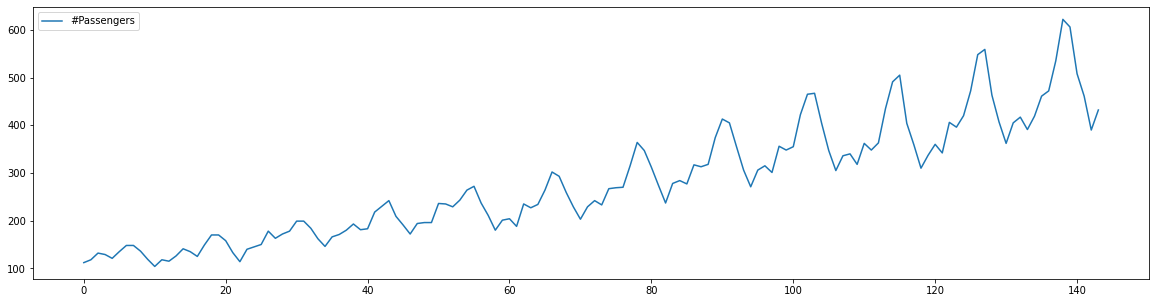

In [22]:
matplotlib.rcParams['figure.figsize'] = [20, 5]
series.plot()
pyplot.show()

In [23]:
series.index= pd.to_datetime(series ['Month'], format='%Y-%m')
series = series.drop(['Month'], axis=1)
series

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [24]:
acf_value = acf(series['#Passengers'])
pacf_value = pacf(series['#Passengers'], nlags = 12)

acf_value

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376])

In [25]:
pacf_value

array([ 1.        ,  0.95467704, -0.26527732,  0.05546955,  0.10885622,
        0.08112579,  0.00412541,  0.15616955,  0.10370833,  0.28878144,
        0.20691805,  0.2411297 , -0.15800498])

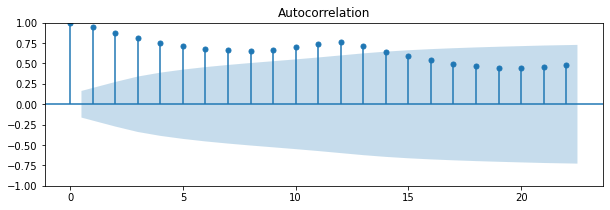

In [26]:
matplotlib.rcParams['figure.figsize'] = [10, 3]
plot_acf(series['#Passengers'])
pyplot.show()

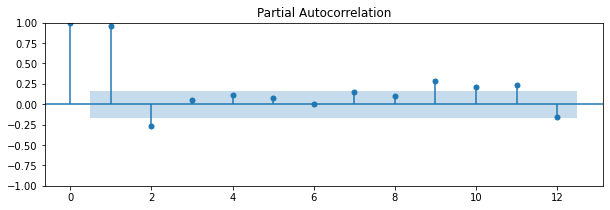

In [27]:
plot_pacf(series['#Passengers'], lags =12)
pyplot.show()

In [28]:
import statsmodels.api as sa

src_data_model = series['#Passengers'][:'1958-05']
model = sa.tsa.ARIMA(src_data_model).fit()

model.summary()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  113
Model:                          ARIMA   Log Likelihood                -664.532
Date:                Tue, 14 Mar 2023   AIC                           1333.064
Time:                        08:17:06   BIC                           1338.519
Sample:                    01-01-1949   HQIC                          1335.278
                         - 05-01-1958                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        236.0000      9.047     26.087      0.000     218.269     253.731
sigma2      7508.1278   1280.101      5.865      0.000    4999.176       1e+04
===================================================================================
Ljung-Box (L1) (Q):                 102.01   Jarque-Bera (JB):                 6.49
Prob(Q):                              0.00   Prob(JB):                         0.04
Heteroskedasticity (H):               1.49   Skew:                             0.53
Prob(H) (two-sided):                  0.22   Kurtosis:                         2.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

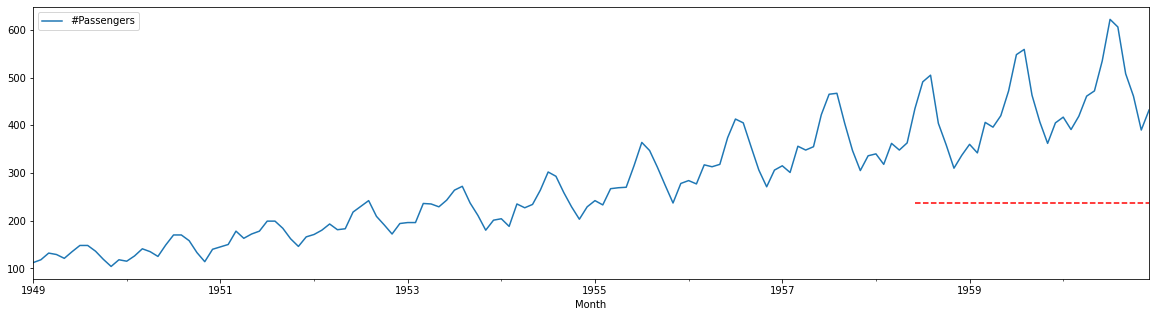

In [30]:
pred = model.predict(start=pd.to_datetime('1958-06'), end=pd.to_datetime('1960-12'), typ='levels')
matplotlib.rcParams['figure.figsize'] = [20, 5]
series.plot()
pred.plot(style='r--')


In [32]:
!pip install ml_metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ml_metrics: filename=ml_metrics-0.1.4-py3-none-any.whl size=7844 sha256=0ff5d84a9dc8c3d568344f18325ee5469959d92b4fa244b0257e15b2df3a3e9d
  Stored in directory: /root/.cache/pip/wheels/c6/b2/69/0691b3d4de7c8d0c604cd7de94f4b2d4478a04ce3b6e4bab15
Successfully built ml_metrics


In [36]:
comp = series['#Passengers']['1958-06':]
import ml_metrics as metrics
print('RMSE=', metrics.rmse(comp, pred),'    MAE=',metrics.mae(comp, pred))


RMSE= 219.3976394793616     MAE= 205.77419750532343


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Month'>

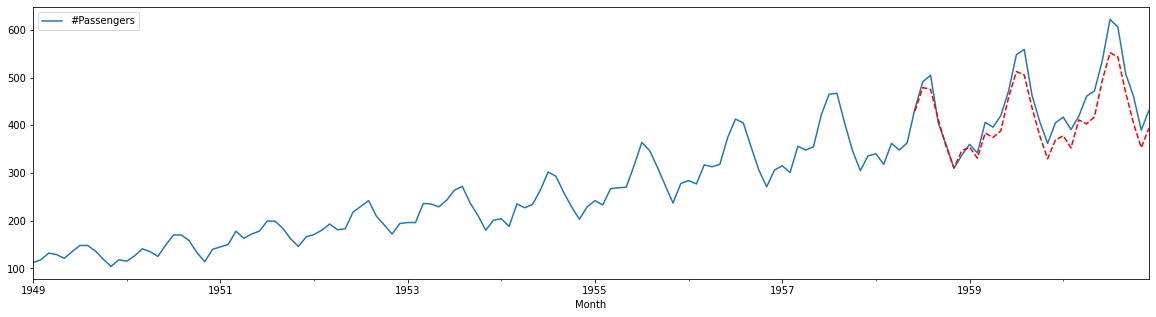

In [37]:
model = sa.tsa.statespace.SARIMAX(src_data_model, seasonal_order=(2,2,2,12)).fit()

pred = model.predict(start=pd.to_datetime('1958-06'), end=pd.to_datetime('1960-12'), typ='levels')

series.plot()
pred.plot(style='r--')



In [38]:
print('RMSE=', metrics.rmse(comp, pred),'    MAE=',metrics.mae(comp, pred))


RMSE= 35.461390466236054     MAE= 29.968906567374756
